---

---

# Raw data

---

# I. Prepare Catalog

In [2]:
# --------------------------------------------------------
# Load libraries
# --------------------------------------------------------
import numpy as np
import zipfile, os
from tqdm import tqdm

# --------------------------------------------------------
# Unzip the file
# --------------------------------------------------------
'''
For HaloMaker
    galaxy:   (GalaxyMaker_xxxxx.pkl, info_xxxxx.txt)
    halo:     (HaloMaker_xxxxx.pkl, info_xxxxx.txt)
'''
zname_HM = "./gm_example.zip" # <- Change this to the name of the zip file you want to extract
with zipfile.ZipFile(zname_HM, 'r') as zip_ref:
    zip_ref.extractall()


# --------------------------------------------------------
# ascii to numpy
# --------------------------------------------------------
# gname = "GalaxyMaker_00623.csv" # <- Change this to the name of the galaxy file you want to read
# with open(gname, 'r') as f:
#     header = f.readline()[2:-1]
#     header = header.split(',')
#     names = [h[:h.index("[")] for h in header]
#     units = [h[h.index("["):] for h in header]
# HMs = np.genfromtxt(gname, delimiter=',', names=names, case_sensitive=True, dtype=None)

# --------------------------------------------------------
# pickle to numpy
# --------------------------------------------------------
if(np.__version__ >= '1.16.3'):
    HMs = np.load("GalaxyMaker_00623.pkl", allow_pickle=True)
else:
    import pickle as pkl
    with open("GalaxyMaker_00623.pkl", 'rb') as f:
        HMs = pkl.load(f)

# --------------------------------------------------------
# Read the parameter file
# --------------------------------------------------------
pname = "info_00623.txt" # <- Change this to the name of the parameter file you want to read
with open(pname, "r") as f:
    HMparams = {key:float(val) if('.' in val) else int(val) for key, val in [line.split(':') for line in f]}

---

# I. Download raw data and read

In [3]:
# Find the position of the target galaxy
target = HMs[43-1] # ID=43

#---------------------------------------------
# ! Warning !
#
# Our query uses (1 kpc = 3.08e21 cm)
#---------------------------------------------
xc = target['X']
yc = target['Y']
zc = target['Z']

print(xc,yc,zc,"  <- Copy this!")

35814.06268058811 40066.03518709942 45948.42974569475   <- Copy this!


1. `https://gemsimulation.com/` - [Data Access] - [Data] - [Download Raw Data]

2. X, Y, Z, Radius are kpc(physical) unit

## ❓QUIZ 01❓
 > **1. Download particle file with Center of (35814.06268058811 40066.03518709942 45948.42974569475) and Box size of 20 kpc**  
 > **2. Move zip file to this directory and change name as `part_example.zip`**  
 > **3. Same for cell and save as `cell_example.zip`**  

---

## 01. Particle

In [4]:
# --------------------------------------------------------
# Load libraries
# --------------------------------------------------------
import numpy as np
import zipfile, os
import pickle
import matplotlib.pyplot as plt


# --------------------------------------------------------
# Unzip the file
# --------------------------------------------------------
zname = "./part_example.zip" # <- Change this to the name of the zip file you want to extract
with zipfile.ZipFile(zname, 'r') as zip_ref:
    pfiles = zip_ref.namelist()
    for pfile in pfiles:
        if(os.path.exists(pfile)):
            continue
        zip_ref.extract(pfile)

# --------------------------------------------------------
# pickle to numpy
# --------------------------------------------------------
pname = pfiles[0]
print(pname)
with open(pname, 'rb') as f:
    part, pparams = pickle.load(f)
print(f"Nparts: {len(part)}")
print(f" > Available:\n{part.dtype.names}")

20250203_847661.pkl
Nparts: 2932147
 > Available:
('xx', 'yy', 'zz', 'vx', 'vy', 'vz', 'mp', 'ap', 'zp', 'gyr', 'sfact', 'redsh', 'family', 'domain', 'id', 'KE', 'UE', 'PE')


**family?**  
`family` represents the type of particle.  
-  1: DM
-  2: Star
-  3: Cloud (of SMBH)
-  0: Gas tracer (following gas motion)
- -2: Star tracer (gas --(SF)--> star)
- -3: Cloud tracer (accreted to SMBH)

In [5]:
family, counts = np.unique(part['family'], return_counts=True)
for f, c in zip(family, counts):
    print(f"Family {f}: {c}")

Family -2: 59918
Family 0: 42273
Family 1: 36765
Family 2: 2791082
Family 3: 2109


## 02. Cell

In [6]:
# --------------------------------------------------------
# Load libraries
# --------------------------------------------------------
import numpy as np
import zipfile, os
import pickle


# --------------------------------------------------------
# Unzip the file
# --------------------------------------------------------
zname = "./cell_example.zip" # <- Change this to the name of the zip file you want to extract
with zipfile.ZipFile(zname, 'r') as zip_ref:
    cfiles = zip_ref.namelist()
    for cfile in cfiles:
        if(os.path.exists(cfile)):
            continue
        zip_ref.extract(cfile)

# --------------------------------------------------------
# pickle to numpy
# --------------------------------------------------------
cname = cfiles[0]
print(cname)
with open(cname, 'rb') as f:
    cell, cparams = pickle.load(f)
print(f"Ncells: {len(cell)}")
print(f" > Available:\n{cell.dtype.names}")

20250203_714699.pkl
Ncells: 1120200
 > Available:
('xx', 'yy', 'zz', 'vx', 'vy', 'vz', 'level', 'dx', 'den', 'temp', 'zp', 'mp', 'KE', 'UE', 'PE', 'chem_H', 'chem_O', 'chem_Fe', 'chem_Mg', 'chem_C', 'chem_N', 'chem_Si', 'chem_S', 'chem_D', 'dust_1', 'dust_2', 'dust_3', 'dust_4', 'refine', 'skip2')


**level?**  
`level` represents the AMR grid level. Higher level means finer (smaller) grid.  
ex)  
Box length is 1 in code unit. (=100 cMpc/h)  
level=10 means 10 times refinement, so the cell size is $1 / 2^{10}$ in code unit. (=97.65625 ckpc/h)   

In [7]:
level, counts = np.unique(cell['level'], return_counts=True)
for l, c in zip(level, counts):
    icell = cell[cell['level']==l][0]
    print(f"lvl. {l}: {c} (dx = {icell['dx']*1000:.2f} pc)")

lvl. 16: 237 (dx = 1211.72 pc)
lvl. 17: 13266 (dx = 605.86 pc)
lvl. 18: 145885 (dx = 302.93 pc)
lvl. 19: 514864 (dx = 151.46 pc)
lvl. 20: 445948 (dx = 75.73 pc)


---

## II. Draw particle image 

Mass-weighted density map 

C:\Users\syj35\AppData\Local\Temp\ipykernel_6864\1518787994.py:19: RuntimeWarning: divide by zero encountered in log10
  column_density = np.log10(mass.T / dA)
C:\Users\syj35\AppData\Local\Temp\ipykernel_6864\1518787994.py:28: RuntimeWarning: divide by zero encountered in log10
  column_density = np.log10(mass.T / dA)
C:\Users\syj35\AppData\Local\Temp\ipykernel_6864\1518787994.py:36: RuntimeWarning: divide by zero encountered in log10
  column_density = np.log10(mass.T / dA)
C:\Users\syj35\AppData\Local\Temp\ipykernel_6864\1518787994.py:45: RuntimeWarning: divide by zero encountered in log10
  column_density = np.log10(mass.T / dA)


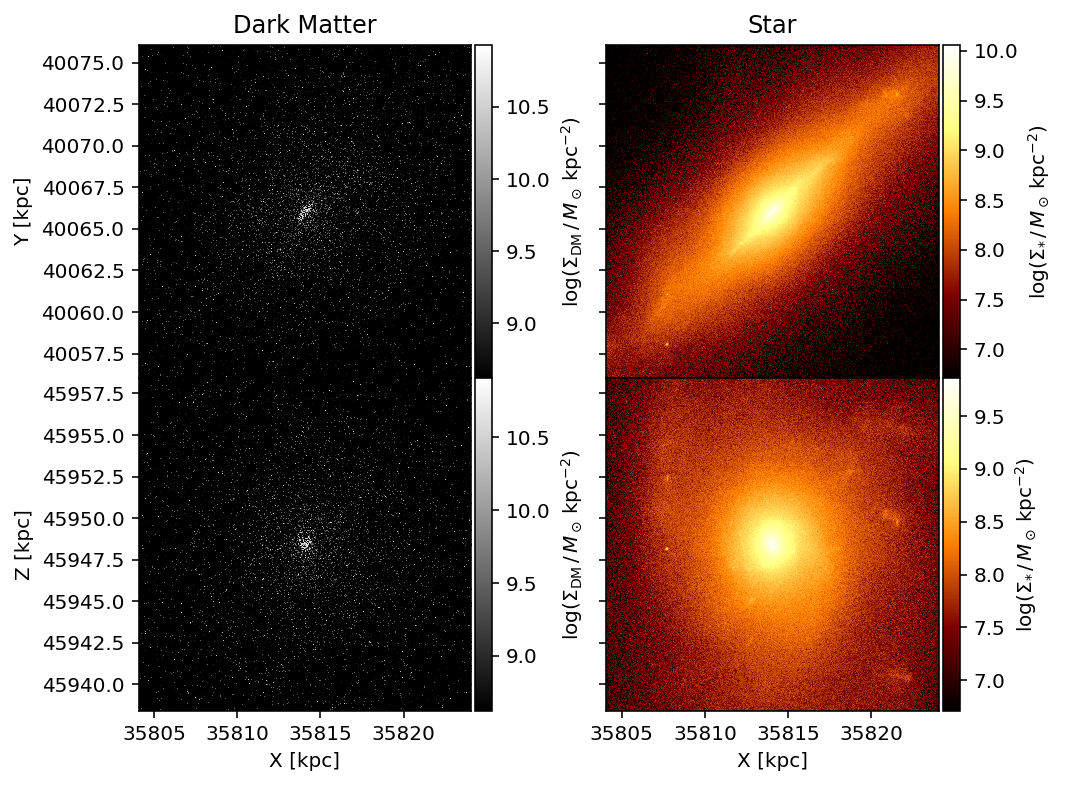

In [8]:
fig, axes = plt.subplots(figsize=(8,6), ncols=2, nrows=2, dpi=144, sharex=True, sharey='row')
# axes:
# [0,0], [0,1]
# [1,0], [1,1]

shape = 360
lbox = 20 # [kpc]
xbins = np.linspace(xc-lbox/2, xc+lbox/2, shape+1)
ybins = np.linspace(yc-lbox/2, yc+lbox/2, shape+1)
zbins = np.linspace(zc-lbox/2, zc+lbox/2, shape+1)
dA = (xbins[1]-xbins[0]) * (ybins[1]-ybins[0]) # [kpc^2]
dm = part[part['family']==1]
star = part[part['family']==2]


# Dark Matter (X-Y)
ax = axes[0,0]; ax.set_facecolor('black')
mass, xe, ye = np.histogram2d(dm['xx'], dm['yy'], bins=[xbins, ybins], weights=dm['mp'])
column_density = np.log10(mass.T / dA)
im = ax.imshow(column_density, extent=[xe[0], xe[-1], ye[0], ye[-1]], origin='lower', cmap='gray', interpolation='none')
fig.colorbar(im, ax=ax, label=r'$\log(\Sigma_{\rm DM}\,/\,M_\odot\,{\rm kpc}^{-2})$', pad=0.01)
ax.set_title('Dark Matter')
ax.set_ylabel('Y [kpc]')

# Star (X-Y)
ax = axes[0,1]; ax.set_facecolor('black')
mass, xe, ye = np.histogram2d(star['xx'], star['yy'], bins=[xbins, ybins], weights=star['mp'])
column_density = np.log10(mass.T / dA)
im = ax.imshow(column_density, extent=[xe[0], xe[-1], ye[0], ye[-1]], origin='lower', cmap='afmhot', interpolation='none')
fig.colorbar(im, ax=ax, label=r'$\log(\Sigma_{*}\,/\,M_\odot\,{\rm kpc}^{-2})$', pad=0.01)
ax.set_title('Star')

# Dark Matter (X-Z)
ax = axes[1,0]; ax.set_facecolor('black')
mass, xe, ye = np.histogram2d(dm['xx'], dm['zz'], bins=[xbins, zbins], weights=dm['mp'])
column_density = np.log10(mass.T / dA)
im = ax.imshow(column_density, extent=[xe[0], xe[-1], ye[0], ye[-1]], origin='lower', cmap='gray', interpolation='none')
fig.colorbar(im, ax=ax, label=r'$\log(\Sigma_{\rm DM}\,/\,M_\odot\,{\rm kpc}^{-2})$', pad=0.01)
ax.set_ylabel('Z [kpc]')
ax.set_xlabel('X [kpc]')

# Star (X-Z)
ax = axes[1,1]; ax.set_facecolor('black')
mass, xe, ye = np.histogram2d(star['xx'], star['zz'], bins=[xbins, zbins], weights=star['mp'])
column_density = np.log10(mass.T / dA)
im = ax.imshow(column_density, extent=[xe[0], xe[-1], ye[0], ye[-1]], origin='lower', cmap='afmhot', interpolation='none')
fig.colorbar(im, ax=ax, label=r'$\log(\Sigma_{*}\,/\,M_\odot\,{\rm kpc}^{-2})$', pad=0.01)
ax.set_xlabel('X [kpc]')

plt.subplots_adjust(wspace=0.1, hspace=0)
plt.show(); plt.close()

---

## III. Draw gas image

### 0) Why visualization of AMR is complex?

2D Histogram is useful method to visualize particles.
However, since cells have different levels (or size), same bin-size to get a histogram cannot represent the size of cells.

<img src="./images/AMR_explain01.png" width="16%" height="16%"><img src="./images/AMR_explain02.png" width="16%" height="16%"><img src="./images/AMR_explain03.png" width="16%" height="16%">

Also, histogram bins should follow the structure of grids to avoid a numerical fluctuation because all cells are distributed evenly. For example, the distribution of cells is perfectly uniform, but the histogram result is not.

<img src="./images/AMR_explain04.png" width="16%" height="16%"><img src="./images/AMR_explain05.png" width="16%" height="16%"><img src="./images/AMR_explain06.png" width="16%" height="16%">

So, we should consider the minimum cell size to visualize the AMR data.

<img src="./images/AMRex.png" width="25%" height="25%">  

[Matsumoto et al. 2013](https://doi.org/10.1585/pfr.8.2406132)  

---

### 1) Set image parameters

In [9]:
from skimage.transform import resize

# Set the desired image output
desired_shape = (480, 480)
proj_order = {'x':0, 'y':1, 'z':2}
desired_proj = 'xz'
print(f"You want to draw {desired_shape} image")
print(f"Projection order: {desired_proj}")

You want to draw (480, 480) image
Projection order: xz


### 2) Check AMR grid

In [10]:
# Convert position to integer
#   [kpc] * 3.086/3.08 *3.086e21 = [cm]
#   [cm] / unit_l = [code unit]
kpc2cm = 3.08e21
dx = cell['dx']*kpc2cm / cparams['unit_l']
mindx = np.min(dx)
dx /= mindx
dx = np.round(dx, 0).astype(int)
print(f"dx={np.unique(dx)}")

ival = desired_proj[0]*2
jval = desired_proj[1]*2
print(f"({ival}, {jval})")

xx = np.round( cell[ival] *kpc2cm / cparams['unit_l'] / mindx, 2)
yy = np.round( cell[jval] *kpc2cm / cparams['unit_l'] / mindx, 2)

# Determine pixel size
mask = cell['level']==np.max(cell['level'])
x1 = int( np.min(xx-0.5*dx) )
x2 = int( np.max(xx+0.5*dx) )
lx = x2-x1
print(f"lx={lx} ({x1}~{x2})")
y1 = int( np.min(yy-0.5*dx) )
y2 = int( np.max(yy+0.5*dx) )
ly = y2-y1
print(f"ly={ly} ({y1}~{y2})")
print(f"-> For the finest cell, the image size is {lx} X {ly}\n")

# Histogram shape of each level
lvls = np.unique(cell['level'])
print(f"levels: {lvls}")
maxlvl = np.max(lvls)
for lvl in lvls:
    print(f"    lvl={lvl}: {int(lx / 2**(maxlvl-lvl))} X {int(ly / 2**(maxlvl-lvl))} image")

# Check whether the smallest cell can be drawn
refactor = 0
while((lx / 2**refactor ) >= 2*desired_shape[0]):
    refactor += 1
    print(f"lvl={lvls[-refactor]}: Too tiny to draw in desired shape ({desired_shape[0]} X {desired_shape[1]})")

dx=[ 1  2  4  8 16]
(xx, zz)
lx=304 (472752~473056)
ly=288 (606576~606864)
-> For the finest cell, the image size is 304 X 288

levels: [16 17 18 19 20]
    lvl=16: 19 X 18 image
    lvl=17: 38 X 36 image
    lvl=18: 76 X 72 image
    lvl=19: 152 X 144 image
    lvl=20: 304 X 288 image


### 3) Draw image

Firstly, draw image (304 X 288)
Level 16 : 237 cells -> (19, 18) image
472744.0 472760.0 472776.0
16 X 16 expansion
Level 17 : 13266 cells -> (38, 36) image
472756.0 472764.0 472772.0
8 X 8 expansion
Level 18 : 145885 cells -> (76, 72) image


C:\Users\syj35\AppData\Local\Temp\ipykernel_6864\4263681869.py:23: RuntimeWarning: divide by zero encountered in log10
  ax.imshow(np.log10(mass.T), extent=[x1, x2, y1, y2], origin='lower', cmap='copper')


472766.0 472770.0 472774.0
4 X 4 expansion
Level 19 : 514864 cells -> (152, 144) image
472767.0 472769.0 472771.0
2 X 2 expansion
Level 20 : 445948 cells -> (304, 288) image
472768.5 472769.5 472770.5
1 X 1 expansion


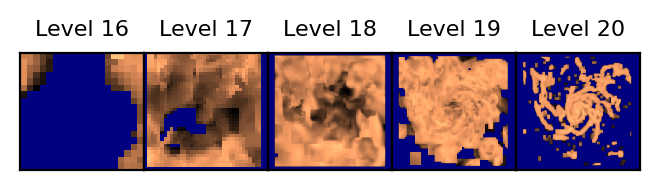

(304, 288) -> (480, 480) resize


C:\Users\syj35\AppData\Local\Temp\ipykernel_6864\4263681869.py:58: RuntimeWarning: divide by zero encountered in log10
  im = ax.imshow(np.log10(img.T), extent=[x1kpc, x2kpc, y1kpc, y2kpc], origin='lower', cmap='copper')


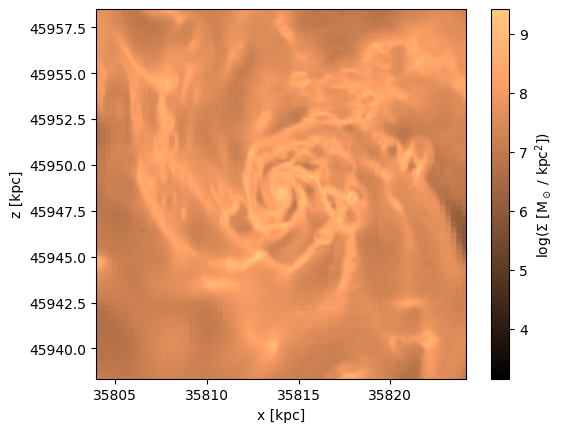

In [11]:
# Setting figure
fig, axes = plt.subplots(ncols=len(lvls), figsize=(4,len(lvls)*4), dpi=200)
plt.subplots_adjust(wspace=0)
for ax in axes.flatten():
    ax.set_facecolor('navy')
    ax.set_xticks([]); ax.set_yticks([])

# Draw the image
sx = lx // 2**refactor; sy = ly // 2**refactor
print(f"Firstly, draw image ({sx} X {sy})")
mass_total = np.zeros((sx,sy))
for ax, lvl in zip(axes,lvls):
    # Histogram shape of each level
    mask = cell['level']==lvl
    factor = 2**max(maxlvl-lvl-refactor, 0)
    shape = (int(sx/factor), int(sy/factor))
    print(f"Level {lvl} : {len(cell[mask])} cells -> {shape} image")
    xbins = np.linspace(x1, x2, shape[0]+1)
    ybins = np.linspace(y1, y2, shape[1]+1)
    mass, xe, ye = np.histogram2d(xx[mask], yy[mask], bins=[xbins, ybins], weights=cell['mp'][mask])
    print(np.min(xx[mask]-dx[mask]),np.min(xx[mask]),np.min(xx[mask]+dx[mask]))
    # Draw sub-image
    ax.imshow(np.log10(mass.T), extent=[x1, x2, y1, y2], origin='lower', cmap='copper')
    ax.set_title(f"Level {lvl}", fontsize=8)
    # ----------------------------------------
    # 1. Expand the image with loop (slower)
    # ----------------------------------------
    # print(f" > {factor} X {factor} expansion")
    # for i in range(factor):
    #     for j in range(factor):
    #         mass_total[i::factor, j::factor] += mass / factor**2

    # ----------------------------------------
    # 2. Expand the image without loop (faster)
    # ----------------------------------------
    print(f"{factor} X {factor} expansion")
    mass_expanded = np.kron(mass, np.ones((factor, factor))) / factor**2
    mass_total += mass_expanded
plt.show(); plt.close()

# Total Image
fig, ax = plt.subplots(dpi=100)

# Mass map -> Column density map
pix2kpc = mindx * cparams['unit_l'] / kpc2cm
column_density_total = mass_total / pix2kpc**2
print(f"{column_density_total.shape} -> {desired_shape} resize")

# Resize the image
img = resize(column_density_total, desired_shape, anti_aliasing=True)

# Convert scale
x1kpc = x1 * mindx * cparams['unit_l'] / kpc2cm # [int] -> [code length] -> [cm] -> [kpc]
x2kpc = x2 * mindx * cparams['unit_l'] / kpc2cm
y1kpc = y1 * mindx * cparams['unit_l'] / kpc2cm
y2kpc = y2 * mindx * cparams['unit_l'] / kpc2cm

im = ax.imshow(np.log10(img.T), extent=[x1kpc, x2kpc, y1kpc, y2kpc], origin='lower', cmap='copper')

finest = cell[cell['level']==np.max(cell['level'])]
lx1 = np.min(finest[ival]-0.5*finest['dx'])
lx2 = np.max(finest[ival]+0.5*finest['dx'])
ly1 = np.min(finest[jval]-0.5*finest['dx'])
ly2 = np.max(finest[jval]+0.5*finest['dx'])
ax.set_xlim([lx1, lx2])
ax.set_ylim([ly1, ly2])

colorbar = fig.colorbar(im, label=r'log($\Sigma$ [M$_\odot$ / kpc$^2$])')
ax.set_xlabel(f'{desired_proj[0]} [kpc]')
ax.set_ylabel(f'{desired_proj[1]} [kpc]')
plt.show(); plt.close()
    
